In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

from matplotlib.lines import Line2D

# Tasks throughput and multi-dvm correlation

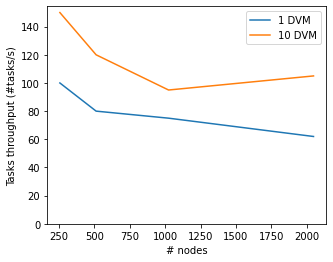

In [2]:
n_nodes_list = [256, 512, 1024, 2048]     # INPUT DATA
tt_1dvm = [100, 80, 75, 62]               # INPUT DATA
tt_10dvm = [150, 120, 95, 105]            # INPUT DATA

fig, ax = plt.subplots(figsize=(5,4))
ax.plot(n_nodes_list, tt_1dvm, label="1 DVM")
ax.plot(n_nodes_list, tt_10dvm, label="10 DVM")

ax.set_ylabel('Tasks throughput (#tasks/s)')
ax.set_ylim(0)
ax.set_xlabel('# nodes')
ax.legend()

plt.show()

# tasks scheduling rate (RP)
# tasks execution rate (RP+DVM)

# Utilization per DVM

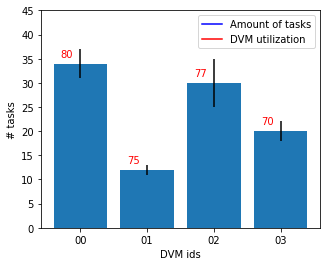

In [3]:
dvm_tasks = {'00': 34, '01': 12, '02': 30, '03': 20}     # INPUT DATA
util_per_dvm = [80, 75, 77, 70]                          # INPUT DATA

dvm_ids, tasks_per_dvm = list(zip(*dvm_tasks.items()))

fig, ax = plt.subplots(figsize=(5,4))

# in case of more than 1 run per DVM use `yerr`
ax.bar(dvm_ids, tasks_per_dvm, yerr=[3, 1, 5, 2])

ax.set_ylabel('# tasks')
ax.set_xlabel('DVM ids')

ax.set_ylim(0,45)

for rect, label in zip(ax.patches, util_per_dvm):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 4, height + 1, 
            label, ha='center', va='bottom', color='red')

ax.legend([Line2D([0], [0], color=c) for c in ['blue', 'red']], 
          ['Amount of tasks', 'DVM utilization'])

plt.show()

# Task exec setup

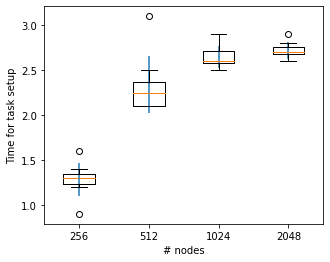

In [4]:
# delta = t_exec - t_runtime, where t_runtime is a sleep time for `hello_rp`, 
#                                   t_exec = task_exec_stop - task_exec_start

n_nodes_list = [256, 512, 1024, 2048]      # INPUT DATA
times_per_node = [[1.2, 2.3, 2.6, 2.7],    # INPUT DATA
                  [1.3, 3.1, 2.9, 2.9],
                  [1.24, 2.1, 2.5, 2.6],
                  [1.4, 2.2, 2.6, 2.6],
                  [1.33, 2.5, 2.55, 2.7],
                  [1.3, 2.1, 2.7, 2.75],
                  [1.6, 2.1, 2.59, 2.8],
                  [0.9, 2.33, 2.75, 2.7]]

# deltas_per_node = [(1.2, .4, .3), (2.3, .8, .2), (2.6, .3, .1), (2.7, .2, .1)]
# deltas_mean, deltas_err_l, deltas_err_h = list(zip(*deltas_per_node))

fig, ax = plt.subplots(figsize=(5,4))

x = np.arange(len(n_nodes_list))
y = np.array(times_per_node)

ax.boxplot(y)
ax.errorbar(x + 1, np.mean(y, axis=0), yerr=np.std(y, axis=0), fmt=',')

ax.set_ylabel('Time for task setup')
ax.set_xlabel('# nodes')
ax.set_xticklabels(str(s) for s in n_nodes_list)

plt.show()

# difference per DVM